# Business Understanding

Understanding customer purchase intent is crucial for businesses as it allows them to better tailor their strategies, optimize resources, and drive revenue growth. By analyzing the likelihood of a customer making a purchase, businesses can prioritize high-intent customers, focusing marketing efforts and sales tactics on those most likely to convert. This insight helps in personalizing customer experiences, improving product recommendations, and enhancing customer satisfaction.

## Problem statement 
The business needs to understand and predict customer purchase intent to better prioritize high-value prospects, optimize marketing strategies, and improve conversion rates. By leveraging machine learning models, the aim is to identify key behaviors and signals of purchase intent in real time and make data-driven predictions that can enhance sales and customer engagement.

## Business Questions
* What behaviours indicate high purchase intend?
* What specific actions increase the likelihood of converting customers with high purchase intend?
* Can we develop a machine learning model to accurately predict customer purchase intent in real-time?
* What actions (e.g., personalized offers, follow-up emails) can we take to maximize conversions from customers with high predicted intent?

## Business Requirements

* Ensure that machine learning models predicting purchase intent do not overlook existing customer relationships or retention efforts.
* Keep marketing and acquisition costs in check while leveraging predictive insights.
* Ensure data privacy and compliance regulations are followed when collecting and using customer data for predictive modeling.

## Expected Benefits
* Achieve a 20% improvement in conversion rates by focusing on customers with high predicted purchase intent.
* Increase the accuracy of customer purchase intent predictions to at least 85%.
* Improve marketing ROI by 15% by targeting high-intent customers with personalized campaigns based on machine learning insights.
* Reduce customer acquisition costs by prioritizing high-purchase intent leads, predicted through machine learning models.

## Success Criteria
* Accuracy - atleast 85%
* Precision, recall and f1_score - atleast 85%

# Data Understanding
The data is from [Kaggle](https://www.kaggle.com/competitions/22122shop/data)

There are 18 variables with 10 quantitative and 7 categorical input features, 500K observations (one row or web session per online user) in a tabular format with the first 50K rows missing the Rev revenue flag (1 for purchase intent and 0 otherwise). The data was collected for the period of 1 year.

Features description (from the dataset authors):

1. `Administrative (Adm)`, `Informational (Inf)`,` Product Related (Prd)`: 
    - counts of different page types viewed by the user in that session. Values are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
2. `Administrative Duration (AdmDur)`, `Informational Duration (InfDur)`, and `Product Related Duration (PrdDur)`: 
    - total time spent on the page of the specified type.
3. `Bounce Rate (BncRt):` 
    - %visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. Measured by Google Analytics
4. `Exit Rate (ExtRt)`: 
    - %visitors that were the last in the session. Calculated as for all pageviews to the page. Measured by Google Analytics.
5. `Page Value (PgVal)`: 
    - average value for a web page that the user visited before completing an e-commerce transaction.
6. `Special Day (SpclDay)`: 
    - closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine's day, this value takes a nonzero value between Feb 2 and Feb 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on Feb 8.
7. `Operating system (OS)` of the user's PC
8. `Browser (Bsr)`: web user's web browser
9. `Region (Rgn) `of the web user
10. `Traffic type (TfcTp)`: TBD
11. `Visitor type (VstTp)`: Type of visitor
12. `Weekend (Wknd)`: whether the page view event took place on weekend
13. `Month of the year (Mo)`: the month of the page view event

# Data preparation

In [1]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 

In [2]:
df = pd.read_csv('XY_shop.csv')
df.head()

,Adm,AdmDur,Inf,InfDur,Prd,PrdDur,BncRt,ExtRt,PgVal,SpclDay,Mo,OS,Bsr,Rgn,TfcTp,VstTp,Wkd,Rev
0,0,0.00,0,0.0,18,132.99,0.038211,0.054523,0.000000,0.0,4,3,1,1,2,0,1,NaN
1,1,0.00,0,0.0,37,1150.20,0.001245,0.030321,0.000000,0.0,11,2,2,4,2,0,1,NaN
2,6,191.98,0,0.0,38,1266.78,0.004742,0.019551,17.816864,0.0,10,2,3,1,3,0,0,NaN
3,3,263.68,0,0.0,24,749.14,0.004474,0.024079,14.578547,0.0,7,2,2,2,1,0,1,NaN
4,0,0.00,0,0.0,3,136.41,0.000000,0.066300,0.000000,0.0,12,1,1,3,3,1,0,NaN


The first 50k rows are missing the rev label. We separate them from the df then try to predict thelabels after modelling.

In [3]:
final_test_data = df.loc[df.Rev.isna()]
final_test_data.head()

,Adm,AdmDur,Inf,InfDur,Prd,PrdDur,BncRt,ExtRt,PgVal,SpclDay,Mo,OS,Bsr,Rgn,TfcTp,VstTp,Wkd,Rev
0,0,0.00,0,0.0,18,132.99,0.038211,0.054523,0.000000,0.0,4,3,1,1,2,0,1,NaN
1,1,0.00,0,0.0,37,1150.20,0.001245,0.030321,0.000000,0.0,11,2,2,4,2,0,1,NaN
2,6,191.98,0,0.0,38,1266.78,0.004742,0.019551,17.816864,0.0,10,2,3,1,3,0,0,NaN
3,3,263.68,0,0.0,24,749.14,0.004474,0.024079,14.578547,0.0,7,2,2,2,1,0,1,NaN
4,0,0.00,0,0.0,3,136.41,0.000000,0.066300,0.000000,0.0,12,1,1,3,3,1,0,NaN


In [4]:
df = df.dropna(subset=['Rev'])
df.head()

,Adm,AdmDur,Inf,InfDur,Prd,PrdDur,BncRt,ExtRt,PgVal,SpclDay,Mo,OS,Bsr,Rgn,TfcTp,VstTp,Wkd,Rev
50000,0,0.00,0,0.0,1,0.00,0.157489,0.115168,0.0,0.0,12,2,2,1,9,0,0,0.0
50001,7,116.19,0,0.0,79,2683.58,0.000000,0.001910,0.0,0.0,4,2,3,2,2,1,0,0.0
50002,6,233.07,0,0.0,8,171.08,0.033427,0.062316,0.0,0.0,12,2,2,2,1,0,0,0.0
50003,0,0.00,0,0.0,5,0.00,0.140943,0.160706,0.0,0.0,6,2,2,3,5,0,0,0.0
50004,0,0.00,0,0.0,6,112.57,0.035324,0.021440,0.0,0.0,10,2,2,4,7,1,1,0.0


In [5]:
# checking for duplicates
df.duplicated().sum()

87

In [6]:
# dropping the duplicates
df.drop_duplicates(inplace=True)

In [7]:
# checking for missing values
df.isna().sum()

Adm        0
AdmDur     0
Inf        0
InfDur     0
Prd        0
PrdDur     0
BncRt      0
ExtRt      0
PgVal      0
SpclDay    0
Mo         0
OS         0
Bsr        0
Rgn        0
TfcTp      0
VstTp      0
Wkd        0
Rev        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449913 entries, 50000 to 499999
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Adm      449913 non-null  int64  
 1   AdmDur   449913 non-null  float64
 2   Inf      449913 non-null  int64  
 3   InfDur   449913 non-null  float64
 4   Prd      449913 non-null  int64  
 5   PrdDur   449913 non-null  float64
 6   BncRt    449913 non-null  float64
 7   ExtRt    449913 non-null  float64
 8   PgVal    449913 non-null  float64
 9   SpclDay  449913 non-null  float64
 10  Mo       449913 non-null  int64  
 11  OS       449913 non-null  int64  
 12  Bsr      449913 non-null  int64  
 13  Rgn      449913 non-null  int64  
 14  TfcTp    449913 non-null  int64  
 15  VstTp    449913 non-null  int64  
 16  Wkd      449913 non-null  int64  
 17  Rev      449913 non-null  float64
dtypes: float64(8), int64(10)
memory usage: 65.2 MB


In [9]:
df['Rev'].value_counts(normalize=True)

0.0    0.775828
1.0    0.224172
Name: Rev, dtype: float64

# Data analysis

### 1. Page visits and Duration

In [10]:
# get the average page visits 
visit_df = df[['Adm', 'Prd', 'Inf']]
avg_page_visits = visit_df.mean().astype(int)

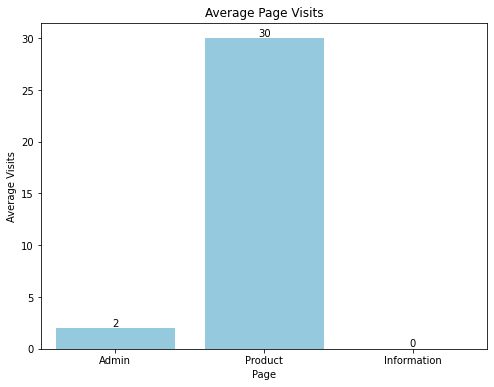

In [11]:
# plotting
plt.figure(figsize=(8,6))
sns.barplot(
    x=avg_page_visits.index,
    y=avg_page_visits.values,
    color='skyblue'
)

# labelling bars
for i, v in enumerate(avg_page_visits.values):
    plt.text(i, v + 0.2, str(v), ha='center')

plt.title('Average Page Visits')
plt.xticks(labels=['Admin', 'Product', 'Information'], ticks=[0, 1, 2]);
plt.ylabel('Average Visits')
plt.xlabel('Page');

Product pages are highest visited with an average of about 30 visits per session. Administrative pages are least visited while informational pages almost not visited.

In [12]:
duration_df = df[['AdmDur', 'PrdDur', 'InfDur']]
avg_duration = duration_df.mean().astype(int)

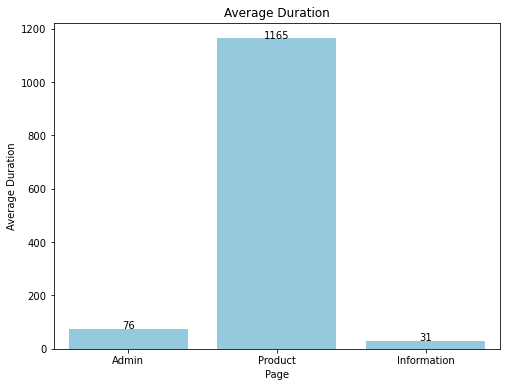

In [13]:
# plotting
plt.figure(figsize=(8,6))
sns.barplot(
    x=avg_duration.index,
    y=avg_duration.values,
    color='skyblue'
)

# labelling bars
for i, v in enumerate(avg_duration.values):
    plt.text(i, v + 0.2, str(v), ha='center')
    
plt.title('Average Duration')
plt.ylabel('Average Duration')
plt.xticks(labels=['Admin', 'Product', 'Information'], ticks=[0, 1, 2]);
plt.xlabel('Page');

Also, as expected, more time is spent on product pages than the other pages

### 2. Comparing duration and effect to make purchase

In [14]:
# grouping to get average duration for customers who made a purchase
duration_effect = df.groupby('Rev')['PrdDur'].mean().astype(int)
duration_effect

Rev
0.0    1061
1.0    1525
Name: PrdDur, dtype: int32

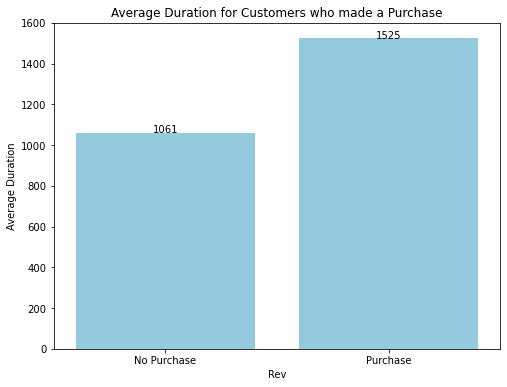

In [15]:
# plotting
plt.figure(figsize=(8,6))
sns.barplot(
    x=duration_effect.index,
    y=duration_effect.values,
    color='skyblue'
)

# labelling bars
for i, v in enumerate(duration_effect.values):
    plt.text(i, v + 0.2, str(v), ha='center')
    
plt.title('Average Duration for Customers who made a Purchase')
plt.ylabel('Average Duration')
plt.xticks(labels=['No Purchase', 'Purchase'], ticks=[0, 1]);

As more time is spent on the product page, the more likely a customer makes a purchase

# Modelling

## Data preprocessing

We  first start by spliting the data in train and test sets

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(['Rev'], axis=1)
y = df['Rev']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. Baseline model

In [18]:
from sklearn.linear_model import LogisticRegression

# fitting a logistic regression model
log_model = LogisticRegression(solver='liblinear')
log_model.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [20]:
# model evaluation
from sklearn.model_selection import cross_val_score

cross_val_score(log_model, X_train, y_train).mean()

0.8050137221171054

### 2. RandomForest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# fitting
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [25]:
# evaluation
rf_clf.score(X_test_scaled, y_test)

0.9906293619253371

The randomforest classifier has better performance with about 19% higher accuracy

### 3. XGboost

In [21]:
from xgboost import XGBClassifier

# fitting
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [22]:
# evaluation
xgb_clf.score(X_test_scaled, y_test)

0.8944247370620294

Currently the random forest classifier is the best performing with about 99% accuracy, Therefore we choose it as the final model.

## Model Tuning and PCA

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

final_model = RandomForestClassifier()

# fitting
final_model.fit(X_train_pca, y_train)
# evaluation
final_model.score(X_test_pca, y_test)


0.9808319775246935

In [28]:
pca.explained_variance_ratio_.sum()

1.0

In this case pca has no major impact in performance of the model and infact lowers the accuracy hence its not benneficial to use it.

In [29]:
# hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(final_model, param_grid, cv=2)

In [30]:
# fitting
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [31]:
grid_search.best_params_

{'max_depth': 30, 'n_estimators': 200}

Now we choose this parameters for our final Random forest classifier

In [32]:
final_model = RandomForestClassifier(n_estimators=200, max_depth=30)

# fitting
final_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=30, n_estimators=200)

# Final Model Evaluation

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [34]:
final_model_preds = final_model.predict(X_test_scaled)

In [36]:
print(classification_report(y_test, final_model_preds))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     87089
         1.0       0.99      0.96      0.98     25390

    accuracy                           0.99    112479
   macro avg       0.99      0.98      0.99    112479
weighted avg       0.99      0.99      0.99    112479



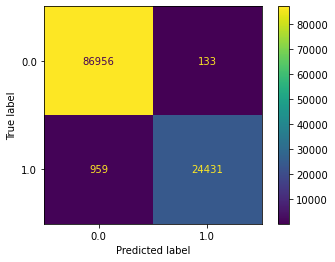

In [52]:


plot_confusion_matrix(final_model, X_test_scaled, y_test);

From the results, our model performs really well.
- `Accuracy = 99%`: this implies that the model correctly identifies if a customer has purchase intent or not 99% of the times.
- `Precision = 99%`: Out of all the Predictions that a customer has purchase intent, 99% are correct.
- `Recall = 96%`: This means that our model correctly identifies 96% of all the customers who actually have purchase intent.

# Conclusion
Our model meets all the success criteria marking a success to the modelling process.

# Predicting the first 50k rows

In [45]:
# preprocessing
final_test_data_scaled = scaler.transform(final_test_data.drop(['Rev'], axis=1))
preds = final_model.predict(final_test_data_scaled)

In [48]:
preds = pd.DataFrame(preds, columns=['Rev'])
preds

,Rev
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
49995,1.0
49996,0.0
49997,1.0
49998,1.0


In [50]:
preds['id'] = preds.index + 1
preds = preds[['id', 'Rev']]
preds.head()

,id,Rev
0,1,0.0
1,2,1.0
2,3,0.0
3,4,0.0
4,5,0.0


In [51]:
# write to csv
preds.to_csv('predictions.csv', index=False)